<a href="https://www.kaggle.com/code/yorkyong/exploring-cifar-10-w-mlp-cnn-resnet?scriptVersionId=169589243" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>

### <b><span style='color:#FFCE30'> 1.1 |</span> Description</b>
The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.
In this notebook, we attempt to use Multi-Layer Perceptron (MLP), Convolutional Neural Network (CNN) and Transfer Learning (ResNet50 - TensorFlow) to build a model than can recognise the image of the test set after being trained on training set from CIFAR-10.

### <b><span style='color:#FFCE30'> 1.2 |</span> Features</b>
- Number of Instances: 60,000 (50,000 for training, 10,000 for testing)
- Image Size: 32x32 pixels, color images (3 color channels)
- Number of Classes: 10

### <b><span style='color:#FFCE30'> 1.3 |</span> Accessibility</b>
The CIFAR-10 dataset is widely used for machine learning and computer vision research and can be easily accessed through libraries like TensorFlow and PyTorch.


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>2 |</span></b> <b>LOAD AND EXPLORATION</b></div>

### <b><span style='color:#FFCE30'> 2.1 |</span> Load</b>

In [1]:
# pip install tensorflow

In [2]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

2024-03-31 14:28:55.425354: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 14:28:55.425465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 14:28:55.584666: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [4]:
# Load the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Exploring the dataset
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [5]:
print('Train Images Shape:      ', x_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nTest Images Shape:       ', x_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (50000, 32, 32, 3)
Train Labels Shape:       (50000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


### <b><span style='color:#FFCE30'> 2.2 |</span> Explore</b>

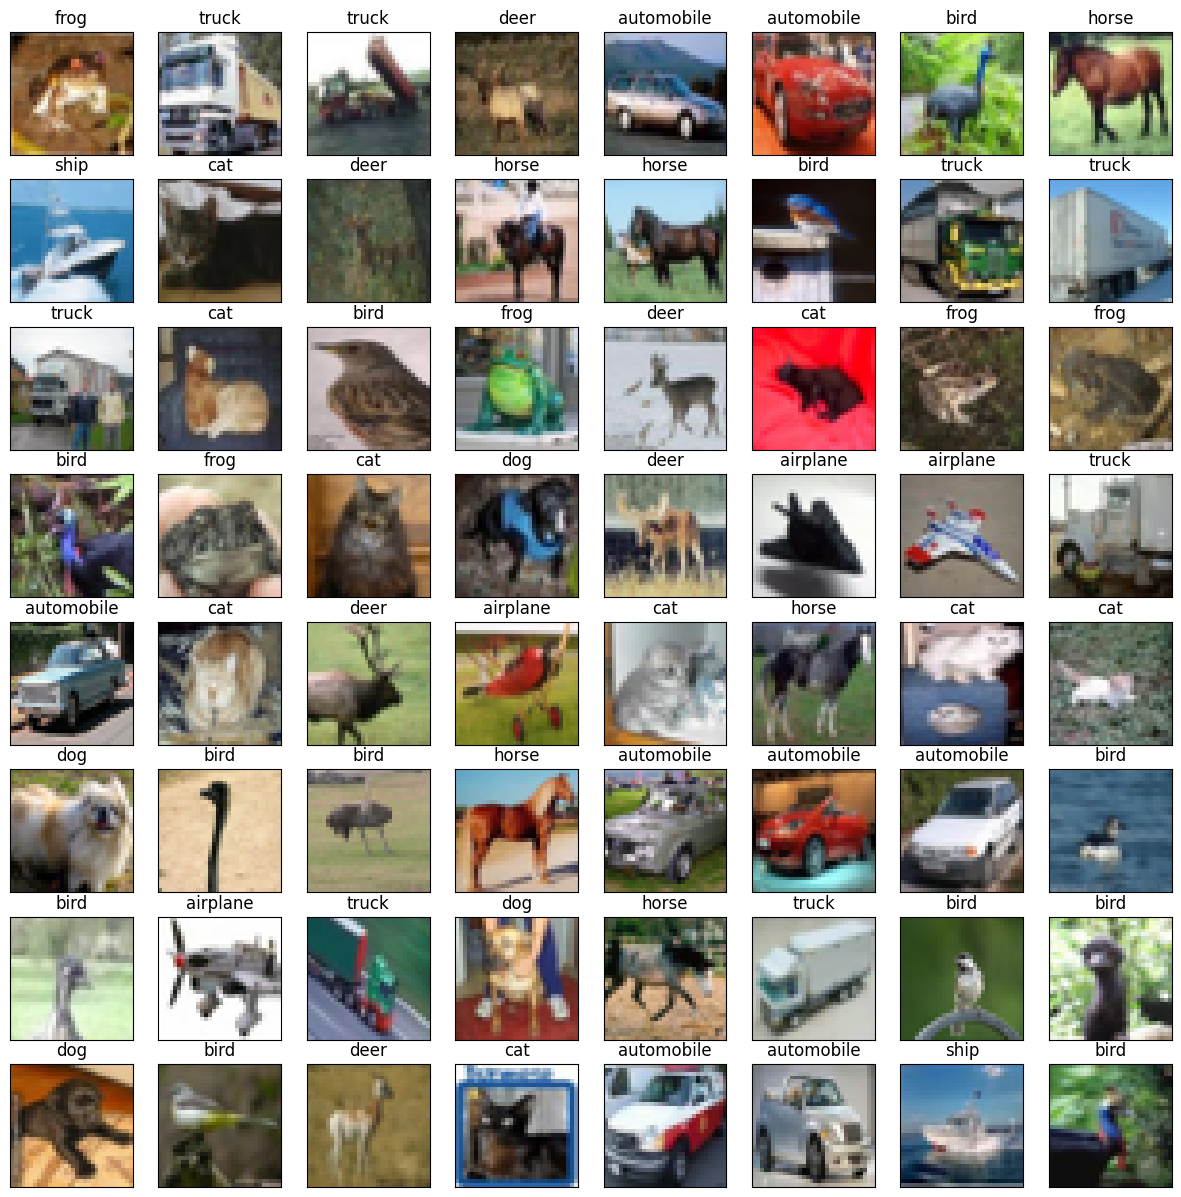

In [6]:
# Exploring the CIFAR-10 dataset with and overview

# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(x_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

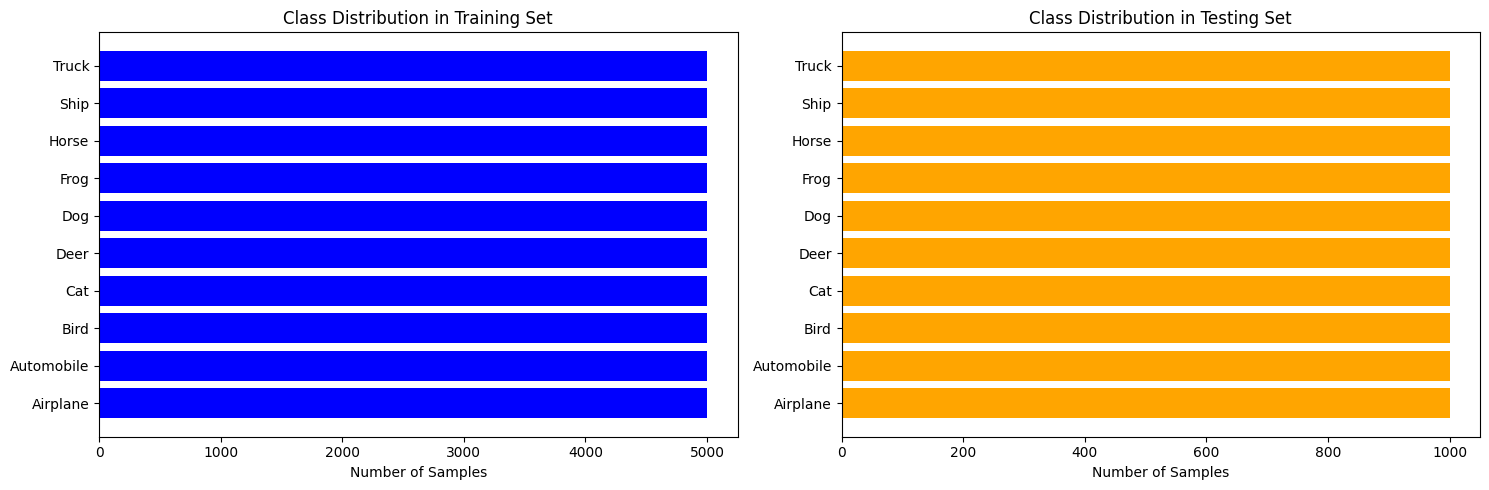

In [7]:
# Define class names
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Get class distribution for training and testing sets
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

# Set figure size and create subplots
plt.figure(figsize=(15, 5))

# Plot class distribution for training set
plt.subplot(1, 2, 1)
plt.barh(classes_name, train_counts, color='blue')
plt.xlabel('Number of Samples')
plt.title('Class Distribution in Training Set')

# Plot class distribution for testing set
plt.subplot(1, 2, 2)
plt.barh(classes_name, test_counts, color='orange')
plt.xlabel('Number of Samples')
plt.title('Class Distribution in Testing Set')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3 |</span></b> <b>DATA NORMALIZATION</b></div>



### <b><span style='color:#FFCE30'> 3.1 |</span> Normalization to [0,1]</b>
- Compute the minimum and maximum pixel values in the training dataset.
- Scale the pixel values to fall within the [0,1] range using Min-Max Scaling formula.

In [8]:
# Method 1: Normalization to [0,1] using Min-Max Scaling
x_train_min = np.min(x_train)
x_train_max = np.max(x_train)
x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)

In [9]:
x_test_normalized = (x_test - x_train_min) / (x_train_max - x_train_min)

### <b><span style='color:#FFCE30'> 3.2 |</span> Normalization to [-1,1] (Standardisation)</b>

In [10]:
# Method 2: Normalization to [-1,1] following a Normal Distribution
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train_standardized = (x_train - x_train_mean) / x_train_std

In [11]:
x_test_standardized = (x_test - x_train_mean) / x_train_std

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>4 |</span></b> <b>IMPLEMENTING A MULTI-LAYER PERCEPTRON FOR CIFAR-10 CLASSIFICATION</b></div>
**Objective:** Build and train a Multi-Layer Perceptron (MLP) to classify images from the CIFAR-10 dataset, and achieve >50% accuracy.

### <b><span style='color:#FFCE30'> 4.1 |</span> Dataset Preparation</b>
- Load and normalizae the CIFAR-10 dataset. 
- Flatten the images to use them with an MLP, as MLPs do not take the spatial structure of the images into account.
- After flattening, each image is represented as a 1-dimensional array of size 3072 (32 * 32 * 3).
- The shape attribute of the arrays provides information about the dimensions of the arrays.

In [12]:
# Flatten the images
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

# Display the shape of flattened images
print("Flattened Training Images Shape:", x_train_flat.shape)
print("Flattened Testing Images Shape:", x_test_flat.shape)

Flattened Training Images Shape: (50000, 3072)
Flattened Testing Images Shape: (10000, 3072)


### <b><span style='color:#FFCE30'> 4.2 |</span> Model Architecture</b>


In [13]:
# Define the MLP model
model = tf.keras.models.Sequential(name="MLP_model") 

# Add layers to the model
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)))  # 3072 = 32x32x3
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### <b><span style='color:#FFCE30'> 4.3 |</span> Training</b>


In [14]:
from tensorflow.keras.optimizers import Adam

# Compile the model
optimizer = Adam()  # Use Adam optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model on the CIFAR-10 training set
history = model.fit(x_train_flat, y_train,
                    epochs=10,  
                    batch_size=128,  
                    validation_split=0.1)  # Use 10% of training data as validation

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
 65/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1703 - loss: 3.1232

I0000 00:00:1711895366.107230     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711895366.122592     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2588 - loss: 2.3075

W0000 00:00:1711895367.645605     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711895368.463756     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2590 - loss: 2.3066 - val_accuracy: 0.3430 - val_loss: 1.8405
Epoch 2/10
 61/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3600 - loss: 1.8030

W0000 00:00:1711895368.926628     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3746 - loss: 1.7652 - val_accuracy: 0.3798 - val_loss: 1.7610
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4046 - loss: 1.6749 - val_accuracy: 0.4258 - val_loss: 1.6545
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4319 - loss: 1.6137 - val_accuracy: 0.4326 - val_loss: 1.6165
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4378 - loss: 1.5729 - val_accuracy: 0.4094 - val_loss: 1.6821
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4519 - loss: 1.5575 - val_accuracy: 0.4552 - val_loss: 1.5614
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4614 - loss: 1.5157 - val_accuracy: 0.4596 - val_loss: 1.5510
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4697 - loss: 1.4975 - val_accuracy: 0.4618 - val_loss: 1.5371
Epoch 9/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4807 - loss: 1.4720 - val_accuracy: 0.4466 - val_

W0000 00:00:1711895379.166397     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4707 - loss: 1.5070
Test Loss: 1.5155216455459595
Test Accuracy: 0.4681999981403351


W0000 00:00:1711895380.086664     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


### <b><span style='color:#FFCE30'> 4.4 |</span> Evaluation</b>

<span style="color: blue;">
The model's performance on the CIFAR-10 test set is as follows:

- Test Loss: 1.50
- Test Accuracy: 0.4587 (45.87%)

<span style="color: blue;">

The model's accuracy on the training set increases gradually over the epochs, reaching around 46% by the end of training.
Similarly, the validation accuracy also increases but remains slightly lower than the training accuracy, indicating that the model generalizes reasonably well to unseen data.
The model's loss (both training and validation) decreases consistently over the epochs, which is expected during the training process.
However, there are still room for improvement as the accuracy is not > 50% yet.

<span style="color: blue;">

Possible next steps to improve:

- Model Complexity: Experiment with increasing the model's complexity by adding more layers, neurons, or using different architectures such as convolutional neural networks (CNNs). CNNs are particularly effective for image classification tasks like CIFAR-10 as they can capture spatial patterns more effectively.

- Hyperparameter Tuning: Experiment with different hyperparameters such as learning rate, batch size, number of epochs, and optimizer settings to find the optimal configuration for your model.

- Data Augmentation: Augment the training data with techniques like rotation, scaling, flipping, or adding noise to increase the diversity of training samples and improve the model's robustness.

### <b><span style='color:#FFCE30'> 4.5 |</span> Hyperparameter Tuning</b>

Hyperparameter Tuning: Besides learning rate, batch size, and number of epochs, number and size of layers of MLP are also hyperparameters that can be tuned. Adding more layers and/or increasing the number of neurons per layer can enable the modeling of more complex functions, but this also increases the risk of overfitting and computational costs. It's advisable to start with simpler models and gradually increase complexity. Try the following architectures using ReLU as the activation function for hidden layers and softmax as the activation function for the output layer:

- (1) MLP with one hidden layer consisting of 128 neurons. 
- (2) MLP with one hidden layer consisting of 256 neurons. 
- (3) MLP with two hidden layers consisting of 256 and 128 neurons, respectively.


In [16]:
# Define the MLP model architectures
def create_mlp_model_1():
    model = tf.keras.models.Sequential([
              
        # Hidden layer with 128 neurons and ReLU activation
        tf.keras.layers.Dense(128, activation='relu', input_shape=(3072,)), # 3072 = 32x32x3
        
        # Output layer with softmax activation for multi-class classification
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

def create_mlp_model_2():
    model = tf.keras.models.Sequential([
                
        # Hidden layer with 256 neurons and ReLU activation
        tf.keras.layers.Dense(256, activation='relu', input_shape=(3072,)), # 3072 = 32x32x3
        
        # Output layer with softmax activation for multi-class classification
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

def create_mlp_model_3():
    model = tf.keras.models.Sequential([
               
        # First hidden layer with 256 neurons and ReLU activation
        tf.keras.layers.Dense(256, activation='relu', input_shape=(3072,)), # 3072 = 32x32x3
        
        # Second hidden layer with 128 neurons and ReLU activation
        tf.keras.layers.Dense(128, activation='relu'),
        
        # Output layer with softmax activation for multi-class classification
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


In [17]:
# Compile and train the model
def compile_and_train_model(model):
    # Compile the model
    optimizer = Adam()  # Use Adam optimizer
    model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    # Train the model on the CIFAR-10 training set
    history = model.fit(x_train_flat, y_train,
                        epochs=10,  
                        batch_size=128,  
                        validation_split=0.1)  # Use 10% of training data as validation

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)


In [18]:

# Create and train models
print("MLP Model with one hidden layer (128 neurons):")
mlp_model_1 = create_mlp_model_1()
compile_and_train_model(mlp_model_1)

print("\nMLP Model with one hidden layer (256 neurons):")
mlp_model_2 = create_mlp_model_2()
compile_and_train_model(mlp_model_2)

print("\nMLP Model with two hidden layers (256 and 128 neurons):")
mlp_model_3 = create_mlp_model_3()
compile_and_train_model(mlp_model_3)

MLP Model with one hidden layer (128 neurons):
Epoch 1/10
 78/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1587 - loss: 2.4145

W0000 00:00:1711895383.044098     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2433 - loss: 2.1226

W0000 00:00:1711895384.383384     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711895385.180569     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2434 - loss: 2.1222 - val_accuracy: 0.3396 - val_loss: 1.8617
Epoch 2/10
 82/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3575 - loss: 1.8276

W0000 00:00:1711895385.566062     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3644 - loss: 1.8043 - val_accuracy: 0.3778 - val_loss: 1.7805
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3900 - loss: 1.7415 - val_accuracy: 0.3700 - val_loss: 1.7629
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3989 - loss: 1.7117 - val_accuracy: 0.4074 - val_loss: 1.6915
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4113 - loss: 1.6660 - val_accuracy: 0.3912 - val_loss: 1.7237
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4174 - loss: 1.6546 - val_accuracy: 0.3970 - val_loss: 1.6879
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4286 - loss: 1.6250 - val_accuracy: 0.4214 - val_loss: 1.6509
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4362 - loss: 1.6037 - val_accuracy: 0.4366 - val_loss: 1.6338
Epoch 9/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4378 - loss: 1.5999 - val_accuracy: 0.4096 - val_

W0000 00:00:1711895397.750739     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2610 - loss: 2.1368

W0000 00:00:1711895399.193486     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711895400.010607     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2611 - loss: 2.1362 - val_accuracy: 0.3654 - val_loss: 1.8063
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3681 - loss: 1.7690 - val_accuracy: 0.4036 - val_loss: 1.7360
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4038 - loss: 1.6891 - val_accuracy: 0.4098 - val_loss: 1.6780
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4176 - loss: 1.6438 - val_accuracy: 0.4152 - val_loss: 1.6668
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4300 - loss: 1.5941 - val_accuracy: 0.4130 - val_loss: 1.6699
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4486 - loss: 1.5610 - val_accuracy: 0.4446 - val_loss: 1.5799
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4471 - loss: 1.5548 - val_accuracy: 0.4354 - val_loss: 1.5822
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4650 - loss: 1.5166 - val_accuracy: 0.4570 - val_

W0000 00:00:1711895409.457411     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4575 - loss: 1.5225
Test Loss: 1.5292412042617798
Test Accuracy: 0.45669999718666077

MLP Model with two hidden layers (256 and 128 neurons):
Epoch 1/10
 65/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1625 - loss: 2.3442

W0000 00:00:1711895413.704702     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2564 - loss: 2.0624

W0000 00:00:1711895415.338076     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711895416.145669     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2565 - loss: 2.0620 - val_accuracy: 0.3714 - val_loss: 1.7887
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3764 - loss: 1.7442 - val_accuracy: 0.3996 - val_loss: 1.6916
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4125 - loss: 1.6357 - val_accuracy: 0.4260 - val_loss: 1.6295
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4410 - loss: 1.5709 - val_accuracy: 0.4366 - val_loss: 1.6056
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4555 - loss: 1.5299 - val_accuracy: 0.4598 - val_loss: 1.5370
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4699 - loss: 1.4934 - val_accuracy: 0.4548 - val_loss: 1.5385
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4786 - loss: 1.4652 - val_accuracy: 0.4696 - val_loss: 1.5014
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4895 - loss: 1.4375 - val_accuracy: 0.4712 - val_

W0000 00:00:1711895426.024900     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4885 - loss: 1.4639
Test Loss: 1.4678876399993896
Test Accuracy: 0.48339998722076416


<span style="color: blue;">

It seems like model 3 (MLP with two hidden layers consisting of 256 and 128 neurons, respectively.) is the closest to 50% but not yet. The additional hidden layers seems to be giving better results. 

We test below by: 
- adding one more layer with 512 neurons
- adjust epoch to 20
- adjust batch size to 256

In [19]:
# Define the MLP model
model = tf.keras.models.Sequential(name="MLP_model_3layer") 

# Add layers to the model
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)))  # 3072 = 32x32x3
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))        
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [20]:
# Compile the model
optimizer = Adam()  # Use Adam optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Train the model on the CIFAR-10 training set
history = model.fit(x_train_flat, y_train,
                    epochs=20,  
                    batch_size=256,  
                    validation_split=0.1)  # Use 10% of training data as validation

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
 50/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1785 - loss: 2.3376

W0000 00:00:1711895430.921345     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2445 - loss: 2.1107

W0000 00:00:1711895432.645227     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711895433.326721     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2448 - loss: 2.1098 - val_accuracy: 0.3342 - val_loss: 1.8283
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3726 - loss: 1.7579 - val_accuracy: 0.4050 - val_loss: 1.6716
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4080 - loss: 1.6454 - val_accuracy: 0.4142 - val_loss: 1.6342
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4285 - loss: 1.5977 - val_accuracy: 0.4386 - val_loss: 1.5800
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4510 - loss: 1.5323 - val_accuracy: 0.4524 - val_loss: 1.5335
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4628 - loss: 1.5039 - val_accuracy: 0.4768 - val_loss: 1.4846
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4842 - loss: 1.4462 - val_accuracy: 0.4774 - val_loss: 1.4873
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4969 - loss: 1.4239 - val_accuracy: 0.4670 - val

W0000 00:00:1711895448.398219     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5239 - loss: 1.3875
Test Loss: 1.3978073596954346
Test Accuracy: 0.5188999772071838


W0000 00:00:1711895449.260978     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


<span style="color: blue;">

The combination of these changes led to improved performance and accuracy (>50%).

- **Adding one more layer with 512 neurons at the start:** Adding more layers and neurons allows the model to capture more complex patterns and relationships within the data. With more neurons and layers, the model becomes more expressive and can learn more intricate representations of the input data. In essence, this change increases the capacity of the model to learn from the data.


- **Adjusting epoch to 20:** Increasing the number of epochs allows the model to see the entire dataset more times during training. This extended training period provides more opportunities for the model to learn from the data and improve its performance. However, it's essential to be cautious about overfitting, which can occur if the model memorizes the training data rather than learning generalizable patterns.


- **Adjusting batch size to 256:** Batch size determines the number of samples used in each iteration of training. A larger batch size can lead to faster convergence during training as the model updates its parameters less frequently. It can also provide more stable gradients, which can lead to better generalization. However, larger batch sizes may require more memory and computational resources.



### <b><span style='color:#FFCE30'> 4.6 |</span> Visually checking the MLP model predictions (51.8% Accuracy)</b>

111/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

W0000 00:00:1711895449.931738     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


W0000 00:00:1711895450.583562     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


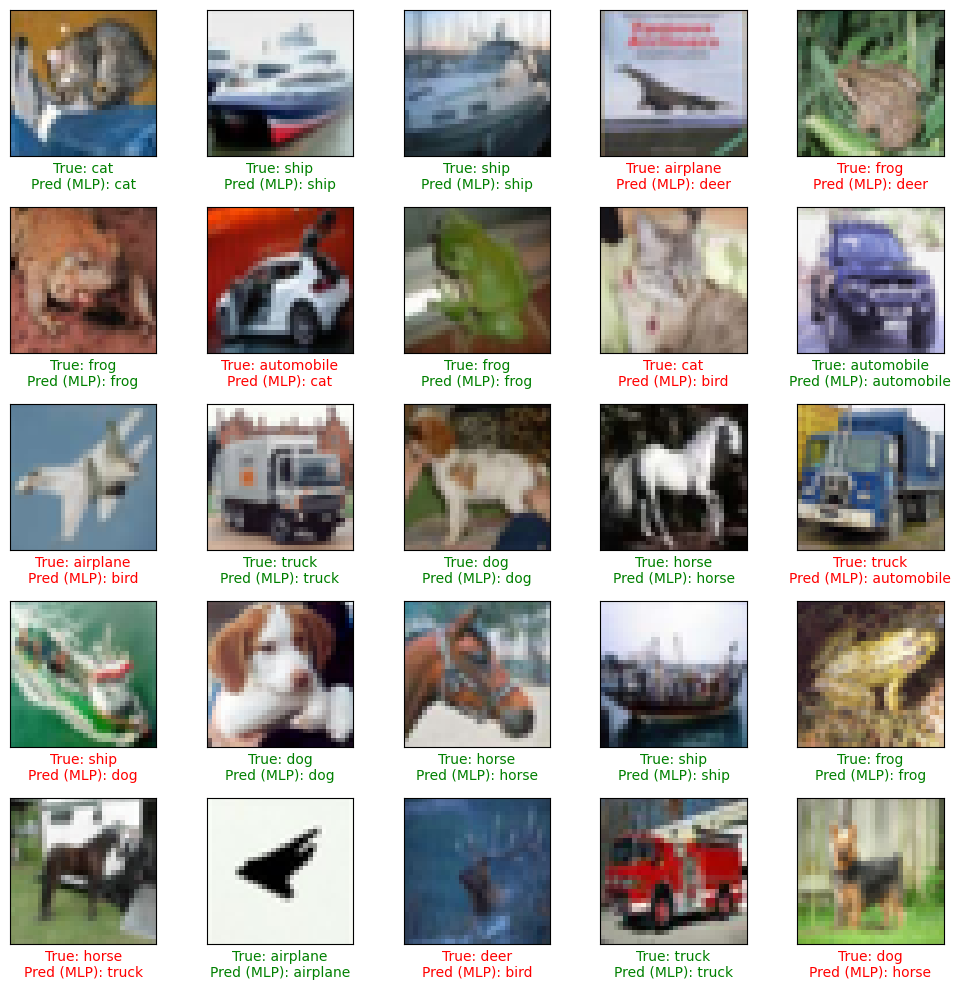

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
predictions_mlp = model.predict(x_test_flat)
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):  # Adjust as needed
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]  # Get predicted label
    if true_label == predicted_label_mlp:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label_mlp}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5 |</span></b> <b>BUILDING A CONVOLUTIONAL NEURAL NETWORK FOR CIFAR-10</b></div>
**Objective:** Develop a Convolutional Neural Network (CNN) to improve the classification performance on the CIFAR-10 dataset, and achieve >70% accuracy.

### <b><span style='color:#FFCE30'> 5.1 |</span> Dataset Preparation</b>
- Load and normalize the CIFAR-10 dataset. 
- Ensure the images are normalized to a range suitable for CNN processing.

In [23]:
# Convert to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the training set
x_train_min = x_train.min(axis=(0, 1, 2), keepdims=True)
x_train_max = x_train.max(axis=(0, 1, 2), keepdims=True)
x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)

# Normalize the test set using training set statistics
x_test_normalized = (x_test - x_train_min) / (x_train_max - x_train_min)

# Display the shapes of the normalized datasets
print("x_train_normalized shape:", x_train_normalized.shape)
print("x_test_normalized shape:", x_test_normalized.shape)

x_train_normalized shape: (50000, 32, 32, 3)
x_test_normalized shape: (10000, 32, 32, 3)


### <b><span style='color:#FFCE30'> 5.2 |</span> CNN Architecture</b>
- Design a CNN that includes convolutional layers, activation functions, pooling layers, and fully connected layers. 
- Detail your choice of kernel sizes, pooling sizes, and the architecture's depth.

In [24]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential(name="CNN_model")

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense (fully connected) layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes


<span style="color: blue;">

- The first layer has 32 filters, followed by a ReLU activation function, 'same' padding, and an input shape of (32, 32, 3) which corresponds to 32x32 RGB images. 
- The subsequent layers continue to add convolutional layers with different numbers of filters and ReLU activations. 
- MaxPooling layers with a pool size of (2, 2) are added after the convolutional layers to downsample the feature maps.
- A Flatten layer is added to transition from the convolutional layers to the dense layers. It flattens the input without affecting the batch size.
- We then add dense (fully connected) layers to the model. The first layer has 128 neurons with ReLU activation, and the output layer has 10 neurons (one for each class in CIFAR-10) with softmax activation, which is typical for multi-class classification problems.

### <b><span style='color:#FFCE30'> 5.3 |</span> Training</b>
- Compile your CNN with a suitable loss function and optimizer. 
- Utilize techniques such as dropout and batch normalization to prevent overfitting and ensure more stable training.

In [25]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential(name="CNN_model")

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer to prevent overfitting
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense (fully connected) layers with batch normalization and dropout
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())  # Batch normalization layer
model.add(layers.Dropout(0.5))  # Dropout layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes

# Compile the model with suitable loss function and optimizer
optimizer = Adam(learning_rate=0.0001)  # Use Adam optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,538 (2.22 MB)

 Trainable params: 582,282 (2.22 MB)

 Non-trainable params: 256 (1.00 KB)

### <b><span style='color:#FFCE30'> 5.4 |</span> Evaluation and Comparison</b>
- Report the accuracy of the model on the CIFAR-10 test set. 
- Compare the performance of your CNN to the MLP model from Question 2, discussing why the CNN performs differently.

In [26]:
# Fit the CNN model on the training set
history = model.fit(x_train_normalized, y_train,
                    epochs=10,  
                    batch_size=128,  
                    validation_split=0.1)  # Use 10% of training data as validation

# Evaluate the CNN model on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
 13/352 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0962 - loss: 3.2341

W0000 00:00:1711895464.642245     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2070 - loss: 2.3559

W0000 00:00:1711895474.173790     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711895475.180702     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.2072 - loss: 2.3550 - val_accuracy: 0.4000 - val_loss: 2.0001
Epoch 2/10
 13/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3506 - loss: 1.7781

W0000 00:00:1711895476.166123     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3790 - loss: 1.6971 - val_accuracy: 0.4772 - val_loss: 1.5103
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4504 - loss: 1.5079 - val_accuracy: 0.5234 - val_loss: 1.3609
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4939 - loss: 1.4019 - val_accuracy: 0.5852 - val_loss: 1.2214
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5408 - loss: 1.2857 - val_accuracy: 0.5782 - val_loss: 1.1988
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5668 - loss: 1.2083 - val_accuracy: 0.6332 - val_loss: 1.0717
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5956 - loss: 1.1505 - val_accuracy: 0.6618 - val_loss: 1.0130
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6111 - loss: 1.1022 - val_accuracy: 0.6504 - val_loss: 1.0075
Epoch 9/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6249 - loss: 1.0637 - val_accuracy: 0.6742 - val_

W0000 00:00:1711895507.610353     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6368 - loss: 1.0380
Test Loss: 1.0487357378005981
Test Accuracy: 0.635699987411499


W0000 00:00:1711895508.960544     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


<span style="color: blue;">

Comparing the performance of the CNN to the MLP model from Question 2, this are potential reasons for differences in performance:

- **CNN's Ability to Capture Spatial Patterns:** CNNs are specifically designed to capture spatial patterns in images. They use convolutional layers that scan the input image with learnable filters to detect local patterns. This ability to capture spatial information can lead to better performance on image classification tasks like CIFAR-10 compared to MLPs, which treat images as flattened vectors and do not consider spatial relationships.


- **Parameter Efficiency:** CNNs typically have fewer parameters compared to fully connected MLPs. CNNs share weights across spatial locations, which allows them to learn efficiently from limited training data. On the other hand, MLPs have fully connected layers, which can lead to a larger number of parameters and increased risk of overfitting, especially on small datasets like CIFAR-10.


- **Feature Hierarchies:** CNNs learn hierarchical representations of features from raw data. Convolutional layers extract low-level features like edges and textures, while deeper layers combine these features to learn more abstract representations. This hierarchical feature learning enables CNNs to effectively represent complex patterns in images, which can result in better performance on image classification tasks.


- **Regularization Techniques:** In the CNN architecture provided, dropout and batch normalization layers are used to prevent overfitting and stabilize training. These regularization techniques help improve the generalization ability of the CNN model by reducing the risk of overfitting to the training data.

### <b><span style='color:#FFCE30'> 5.5 |</span> Visually checking the model predictions (63.5% Accuracy)</b>

101/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1711895509.796011     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


W0000 00:00:1711895510.633104     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


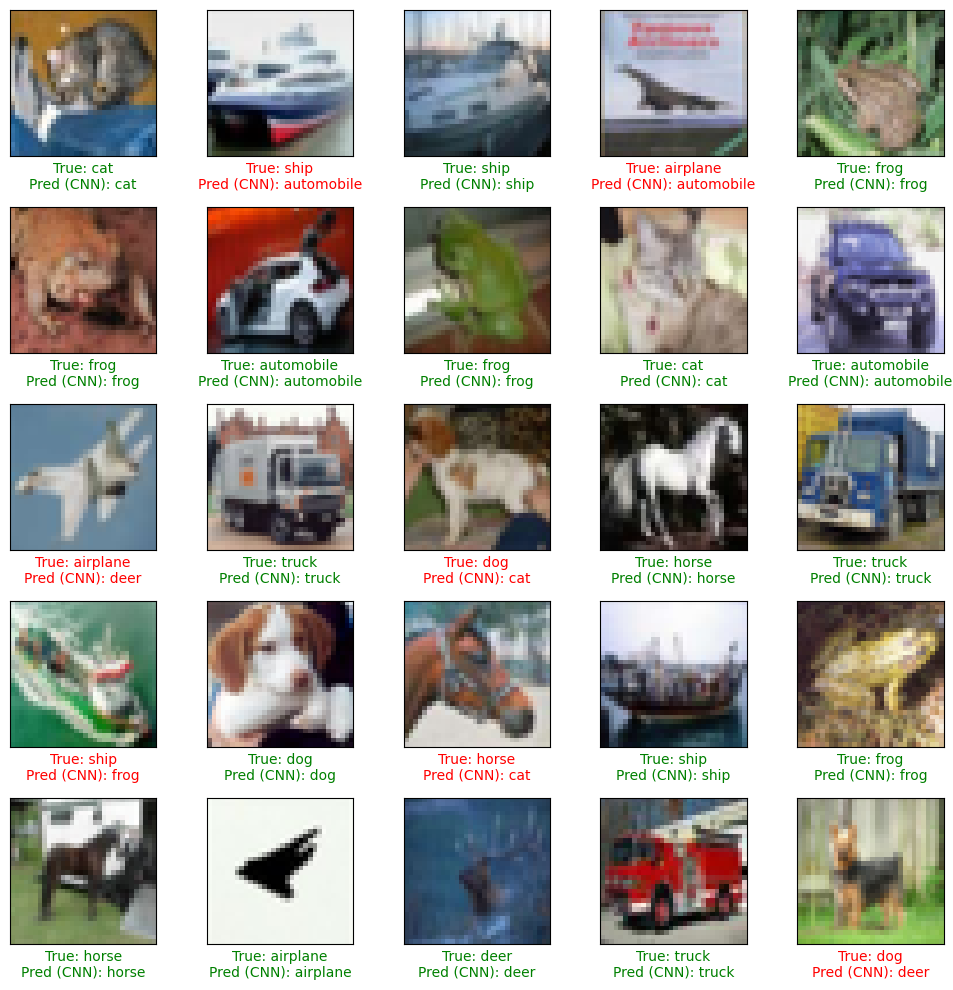

In [27]:
# Get predictions for the test set
predictions_cnn = model.predict(x_test_normalized)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):  # Adjust as needed
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_normalized[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label = class_names[predicted_labels_cnn[i]]  # Get predicted label
    if true_label == predicted_label:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>6 |</span></b> <b>LEVRAGING A PRETRAINED MODEL FOR CIFAR-10</b></div>
**Objective:** Use a pretrained model from TensorFlow's Keras applications or PyTorch's torchvision models as a feature extractor or for fine-tuning on the CIFAR-10 dataset, and achieve >90% accuracy on the test dataset of CIFAR-10. .

### <b><span style='color:#FFCE30'> 6.1 |</span> Dataset Preparation</b>
- Load the CIFAR-10 dataset, applying normalization and any required preprocessing to match the input format of the pretrained model.

<span style="color: blue;">
    
- The CIFAR-10 dataset is loaded using the tf.keras.datasets.cifar10.load_data() function.
- After loading, the input images are converted to float32 data type and normalized.
- Preprocessing is applied using the ResNet50 preprocessing function tf.keras.applications.resnet50.preprocess_input().
- Train test split is used to split out train set at 0.1 which we will need to use for validation later (with data augmentation)
- There is also a OHE performed in order to better allow the classess to be distinct

</span>

In [28]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [29]:
from sklearn.model_selection import train_test_split

# Preprocess input images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Preprocess input images using ResNet50 preprocessing
x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)


In [30]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.1)

In [31]:
from keras.utils import to_categorical

#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [32]:
#Print the dimensions of the datasets to check

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((45000, 32, 32, 3), (45000, 10))
((5000, 32, 32, 3), (5000, 10))
((10000, 32, 32, 3), (10000, 10))


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Augmentation Function: Let's define an instance of the ImageDataGenerator class and set the parameters.
train_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,)

val_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,)

test_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,) 

### <b><span style='color:#FFCE30'> 6.2 |</span> Model Selection, Modification and Training Strategy</b>
- Choose a pretrained model (e.g., ResNet, VGG16) and modify it for CIFAR-10 classification. 
- Describe how you adapt the model for the 10 classes of CIFAR-10 (e.g., modifying the top layer, adjusting input size).
- Decide whether to freeze the weights of the pretrained layers and only train the top layer(s), or to fine-tune the entire network. 
- Justify your choice based on the CIFAR-10 dataset's characteristics.

<span style="color: blue;">

**Chosen Model and exclude top layer**
- The chosen pretrained model is ResNet50, which is loaded using the tf.keras.applications.ResNet50 function. 
- The model is configured to exclude the top classification layer (include_top=False).

</span>

<span style="color: blue;">

**Adjusting inputsize and modify top layer**

- The input images for CIFAR-10 are 32x32 pixels, while ResNet50 expects input images of size 224x224 pixels.
- Therefore, the input images are upsampled to match the input size required by ResNet50.
-
The classification layers are modified by adding a global average pooling layer and two dense lay
- . The final dense layer has 10 units with softmax activation, corresponding to the 10 class in CIFAR-10.

<span style="color: blue;">

**Unfreezing some pre-trained layers**
- In this case, some of the weights of the pretrained layers are not frozen. As such, they will be fine-tuned during training. 
- This decision allows the model to adapt slightly to the features specific to the CIFAR-10 dataset.
- The down-side is that it could take more parameters and therefore more computational time

</span>

<span style="color: blue;">

**Justification of choices**
- CIFAR-10 is a relatively small dataset with low-resolution images.
- Fine-tuning the some of the network allows the model to learn more specific features relevant to the CIFAR-10 dataset.
- Since ResNet50 is pretrained on a large dataset (ImageNet) and has already learned valuable hierarchical features, fine-tuning some layers in the entire network can help improve model performance on CIFAR-10.
- To set it as a variable to decide how many layers to unfreeze

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50  # Import ResNet50 model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization, UpSampling2D
from tensorflow.keras.models import Model

# Feature Extraction is performed by ResNet50 pretrained on imagenet weights. 
# Input size is 224 x 224.
inputs = tf.keras.layers.Input(shape=(32, 32, 3))

# Upsample the input image to match the size expected by ResNet50
resized_inputs = UpSampling2D(size=(7, 7))(inputs)

In [35]:
# Load the ResNet50 model with pretrained weights
resnet_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=resized_inputs  # Use resized input as input tensor
)

# Freeze all layers initially
for layer in resnet_model.layers:
    layer.trainable = False

# Unfreeze the last X layers of the ResNet50 model
NUM_LAYERS_TO_UNFREEZE = 30
for layer in resnet_model.layers[-NUM_LAYERS_TO_UNFREEZE:]:
    layer.trainable = True

# Global average pooling and classification layers
x = GlobalAveragePooling2D()(resnet_model.output)
x = Dense(1024, activation="relu")(x)
x = BatchNormalization()(x)  
x = Dropout(0.3)(x)  
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)  
x = Dropout(0.2)(x)  
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)  
x = Dropout(0.2)(x)  
classification_output = Dense(10, activation="softmax", name="classification")(x)

# Connect the feature extraction and "classifier" layers to build the model
ResNet_model = Model(inputs=inputs, outputs=classification_output, name="ResNet")

# Compile the model
optimizer = tf.keras.optimizers.Adam()  # Use Adam optimizer


#Specify the loss as categorical_crossentropy since the labels are 1 hot encoded. 
#If labels are integer, use sparse categorical crossentropy as loss function.
ResNet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ResNet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "ResNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 224, 224,  │          0 │ input_layer_7[0]… │
│ (UpSampling2D)      │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ up_sampling2d[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c

 Total params: 26,351,754 (100.52 MB)

 Trainable params: 17,210,634 (65.65 MB)

 Non-trainable params: 9,141,120 (34.87 MB)

In [36]:
# Count the number of layers
num_layers = len(ResNet_model.layers)
print("Number of layers in the model:", num_layers)

Number of layers in the model: 187


### <b><span style='color:#FFCE30'> 6.3 |</span> Evaluation</b>
- Test the model on the CIFAR-10 test set and report the accuracy. 
- Compare the results with the MLP and CNN models from the previous questions, discussing the advantages and limitations of using pretrained models on a dataset like CIFAR-10.

In [37]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Add ReduceLROnPlateau callback
# Here, the learning rate will be reduced by half (factor=0.5) if no improvement in validation loss is observed for 1 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.00001)

# Add EarlyStopping callback
# Here, training will be stopped if no improvement in validation loss is observed for 5 epochs.
# The `restore_best_weights` parameter ensures that the model weights are reset to the values from the epoch
# with the best value of the monitored quantity (in this case, 'val_loss').
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)


batch_size=64
epochs=15

history = ResNet_model.fit(train_generator.flow(x_train,y_train,batch_size=batch_size),
                                     epochs=epochs,
                                     steps_per_epoch=x_train.shape[0]//batch_size,
                                     validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),
                                     #validation_steps=250,
                                     callbacks=[reduce_lr, early_stopping],
                                     shuffle = True
                                    )
# Evaluate the model
test_loss, test_accuracy = ResNet_model.evaluate(test_generator.flow(x_test,y_test,batch_size=batch_size))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/15


W0000 00:00:1711895556.611916     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


150/703 ━━━━━━━━━━━━━━━━━━━━ 2:48 304ms/step - accuracy: 0.5475 - loss: 1.4262

W0000 00:00:1711895602.185296     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.6768 - loss: 0.9927

W0000 00:00:1711895715.069907     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711895728.566230     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


703/703 ━━━━━━━━━━━━━━━━━━━━ 213s 245ms/step - accuracy: 0.6769 - loss: 0.9923 - val_accuracy: 0.8082 - val_loss: 0.5523 - learning_rate: 0.0010
Epoch 2/15
703/703 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8281 - loss: 0.4648 - val_accuracy: 0.8158 - val_loss: 0.5397 - learning_rate: 0.0010
Epoch 3/15
703/703 ━━━━━━━━━━━━━━━━━━━━ 149s 212ms/step - accuracy: 0.8391 - loss: 0.4793 - val_accuracy: 0.8620 - val_loss: 0.4214 - learning_rate: 0.0010
Epoch 4/15
703/703 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8906 - loss: 0.3193 - val_accuracy: 0.8640 - val_loss: 0.4316 - learning_rate: 0.0010
Epoch 5/15
703/703 ━━━━━━━━━━━━━━━━━━━━ 149s 212ms/step - accuracy: 0.8845 - loss: 0.3333 - val_accuracy: 0.8866 - val_loss: 0.3342 - learning_rate: 5.0000e-04
Epoch 6/15
703/703 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8750 - loss: 0.2143 - val_accuracy: 0.8816 - val_loss: 0.3648 - learning_rate: 5.0000e-04
Epoch 7/15
703/703 ━━━━━━━━━━━━━━━━━━━━ 149s 212ms/step - accuracy: 0.912

W0000 00:00:1711896885.253752     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


<span style="color: blue;">

After multiple iterations, combinations as well as computational time, we finally arrive at a test accuracy of 0.914 that is > 90%.
The set-up of the model to achieve this is as such:

- Train test split for validation data
- OHE the categories of classes
- Use image generator for Data augmentation
- Use ResNet50 and exclude top layer and add our own Nueral Network to Batch Normalise and droupout before classifying into 10 nodes
- Used upsampling (7,7) to match with CIFAR-10 (32 x 32) images with ResNet 224 x 224 input size
- Initially freeze all layers but subsuequently unfreeze 20 layers to allow some weights in ResNet50 to be updated and improve performance
- Use Adam optimizer rather than SGD as if has adaptive learning rates
- Include reduce learning rate and early stopping functions in fitting to ensure each epoch helps to improve the result
- include shuffle = True to ensure model does not learn also the sequence of data and cause overfitting

<span style="color: blue;">

**Advantages of using pretrained models like ResNet on CIFAR-10:**

- Transfer Learning: Pretrained models come with knowledge learned from large-scale datasets like ImageNet, which can be transferred to CIFAR-10, improving performance with limited labeled data.
- Feature Extraction: Pretrained models can extract meaningful features from images, capturing hierarchical representations that might not be effectively learned from scratch.
- Higher accuracy: Using a pretrained model that is based on a much larger dataset can help to achieve much higher accuracy than other models built from scratch since the training data was much larger than what we have.

**Limitations of using pretrained models:**

- Domain Adaptation: Pretrained models might not perfectly adapt to the characteristics of CIFAR-10, leading to suboptimal performance.
- Task Specificity: Pretrained models are designed for specific tasks, and their features might not always be relevant to CIFAR-10 classification tasks.
- Overfitting Risk: Fine-tuning the entire pretrained model on a small dataset like CIFAR-10 can lead to overfitting if not properly regularized.

### <b><span style='color:#FFCE30'> 6.4 |</span> Visually checking the model predictions (91.4% Accuracy)</b>

In [38]:
# Get predictions for the test set
predictions_resnet = ResNet_model.predict(x_test)
predicted_labels_resnet = np.argmax(predictions_resnet, axis=1)

  4/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step

W0000 00:00:1711896895.673387     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step


W0000 00:00:1711896923.093497     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


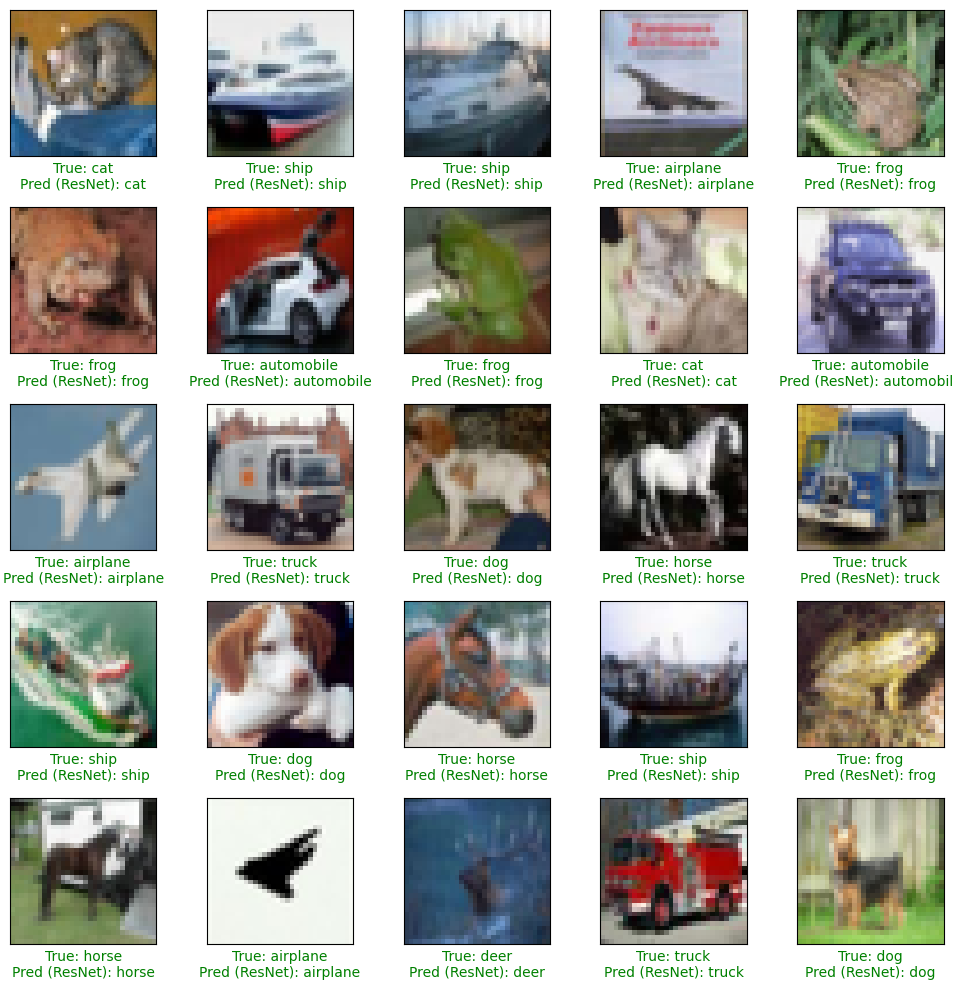

In [39]:
# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):  # Adjust as needed
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Revert preprocessing for visualization by reloading CIFAR-10 dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    plt.imshow(x_test[i])  #Plot original picture
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label = class_names[predicted_labels_resnet[i]]  # Get predicted label
    if true_label == predicted_label:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (ResNet): {predicted_label}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()
